In [356]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import math
import sqlite3
import numpy as np
import pandas as pd
import shap
from sklearn.cluster import DBSCAN
# from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,OneHotEncoder, PolynomialFeatures
# from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression
from sklearn.datasets import load_linnerud
from sklearn.metrics import roc_curve,roc_auc_score,r2_score, mean_squared_error,accuracy_score, f1_score, cohen_kappa_score, hinge_loss, mean_absolute_percentage_error
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import kstest
import joblib
import torch
import torch.nn as nn
import torch.utils.data as Data # 数据预处理
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer
from scipy.stats import ks_2samp
import datetime
from sklearn.decomposition import PCA
from scipy import stats

In [357]:
tpu_count = pd.read_csv('F:\python\TPU_data\covid_TPU_count_selected_normalized.csv', index_col=0)
#case_tpu = pd.read_csv('covid_case_TPU_selected.csv', index_col=0)

In [358]:

#print(tpu_count.loc[tpu_count['count']>200])
tpu_count.loc[tpu_count['count']>200,'count'] = 200
tpu_count['count'].max()


200

In [359]:
features = tpu_count.columns[-47:].values

features = np.append(features, 'Total Population')
#print(features)
#print(type(features))
#print(len(features))

In [360]:

for i in features:
    correlation, p_value = stats.spearmanr(tpu_count[i], tpu_count['count'])
    #correlation, p_value = stats.kendalltau(tpu_count[i], tpu_count['count'])
    #correlation, p_value = stats.pearsonr(tpu_count[i], tpu_count['count'])
    if p_value > 0.05:
        print(i)
        #print(np.where(features==i)[0][0])
        features = np.delete(features, np.where(features==i)[0][0])

print(len(features))


"\nfor i in features:\n    correlation, p_value = stats.spearmanr(tpu_count[i], tpu_count['count'])\n    #correlation, p_value = stats.kendalltau(tpu_count[i], tpu_count['count'])\n    #correlation, p_value = stats.pearsonr(tpu_count[i], tpu_count['count'])\n    if p_value > 0.05:\n        print(i)\n        #print(np.where(features==i)[0][0])\n        features = np.delete(features, np.where(features==i)[0][0])\n\nprint(len(features))\n"

In [361]:
tpu_count[features] = tpu_count[features].replace('-',0)

In [362]:
df = tpu_count[features]

In [363]:
#plt.figure(figsize=(10, 10))
#sns.heatmap(df.corr(method='spearman'), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

In [364]:
#pd.reset_option("display.max_rows")
#abs(df.corrwith(tpu_count['count'], method='kendall')).sort_values(ascending=False)

In [365]:
#abs(df.corrwith(tpu_count['count'], method='spearman')).sort_values(ascending=False)

In [366]:
#correlation, p_value = stats.pearsonr(df['Population Density'], tpu_count['count'])
#print(correlation)

In [367]:
#abs(df.corrwith(tpu_count['count'], method='pearson')).sort_values(ascending=False)

In [368]:
tpu_count['count_class'] = tpu_count['count']
tpu_count.loc[tpu_count['count']<20,'count_class'] = 0
tpu_count.loc[(tpu_count['count']>=10) & (tpu_count['count']<100),'count_class'] = 1
#tpu_count.loc[(tpu_count['count']>=50) & (tpu_count['count']<100),'count_class'] = 2
tpu_count.loc[(tpu_count['count']>=100) & (tpu_count['count']<200),'count_class'] = 3
tpu_count.loc[tpu_count['count']>200,'count_class'] = 4

In [369]:
imputer = KNNImputer(n_neighbors=13)
imputed = imputer.fit_transform(df)
d_imputed = pd.DataFrame(imputed, columns=df.columns)

x_train, x_test, y_train, y_test=train_test_split(d_imputed, tpu_count['count'], test_size=0.2, random_state=6)
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

KNeighbors
0.3199755303704398
Random Forest
0.7518909733214694
Decision Tree
0.2661267997731258
Linear Regression
-0.8203569616784296


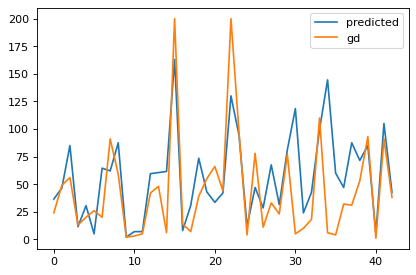

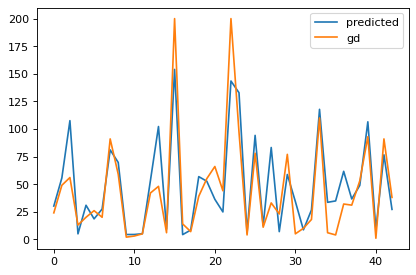

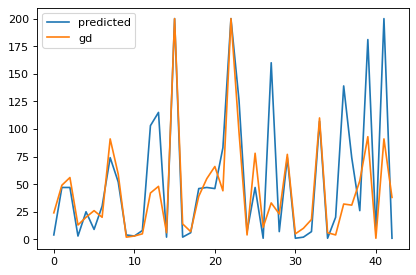

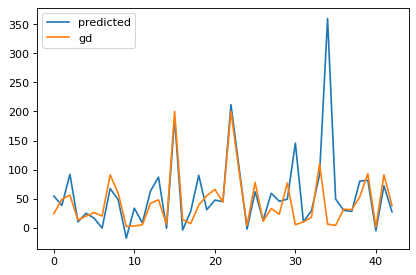

In [370]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print('KNeighbors')
print(r2_score(y_test, y_pred_test))
fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_pred_test)
plt.plot(y_test.values)
plt.legend(['predicted','gd'])

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print('Random Forest')
print(r2_score(y_test, y_pred_test))
fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_pred_test)
plt.plot(y_test.values)
plt.legend(['predicted','gd'])


print('Decision Tree')
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print(r2_score(y_test, y_pred_test))
fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_pred_test)
plt.plot(y_test.values)
plt.legend(['predicted','gd'])

print('Linear Regression')
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print(r2_score(y_test, y_pred_test))
fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_pred_test)
plt.plot(y_test.values)
plt.legend(['predicted','gd'])
k = r2_score(y_test, y_pred_test)

# print('Quadratic Regression')
# degrees = PolynomialFeatures(degree=2)
# x_train_trans = degrees.fit_transform(x_train)
# x_test_trans = degrees.fit_transform(x_test)
# model = LinearRegression()
# model.fit(x_train_trans, y_train)
# y_pred_test = model.predict(x_test_trans)
# print(r2_score(y_test, y_pred_test))
# fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
# plt.plot(y_pred_test)
# plt.plot(y_test.values)
# plt.legend(['predicted','gd'])

1.0292739714129298
0.7921727258842368
7.326481933022242e-05
0.9999999999090915


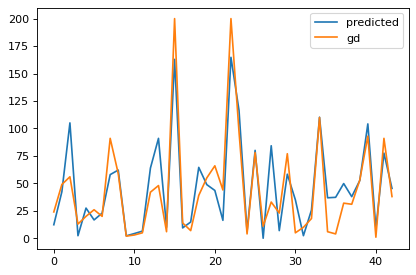

In [371]:
model = xgb.XGBRegressor(n_estimators = 1000,  #950
                         learning_rate = 0.05,  #0.974/973
                         max_depth=7,
                         min_child_weight=1, 
                         seed=1,
                         subsample=0.8,
                         colsample_bytree=0.8, 
                         gamma=0, 
                         reg_alpha=0, 
                         reg_lambda=0)
model.fit(x_train,y_train, verbose=False)
y_pred_test = model.predict(x_test)
k = r2_score(y_test, y_pred_test)
print(mean_absolute_percentage_error(y_test, y_pred_test))
print(k)
fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(y_pred_test)
plt.plot(y_test.values)
plt.legend(['predicted','gd'])
y_pred_test = model.predict(x_train)
print(mean_absolute_percentage_error(y_train, y_pred_test))
print(r2_score(y_train, y_pred_test))

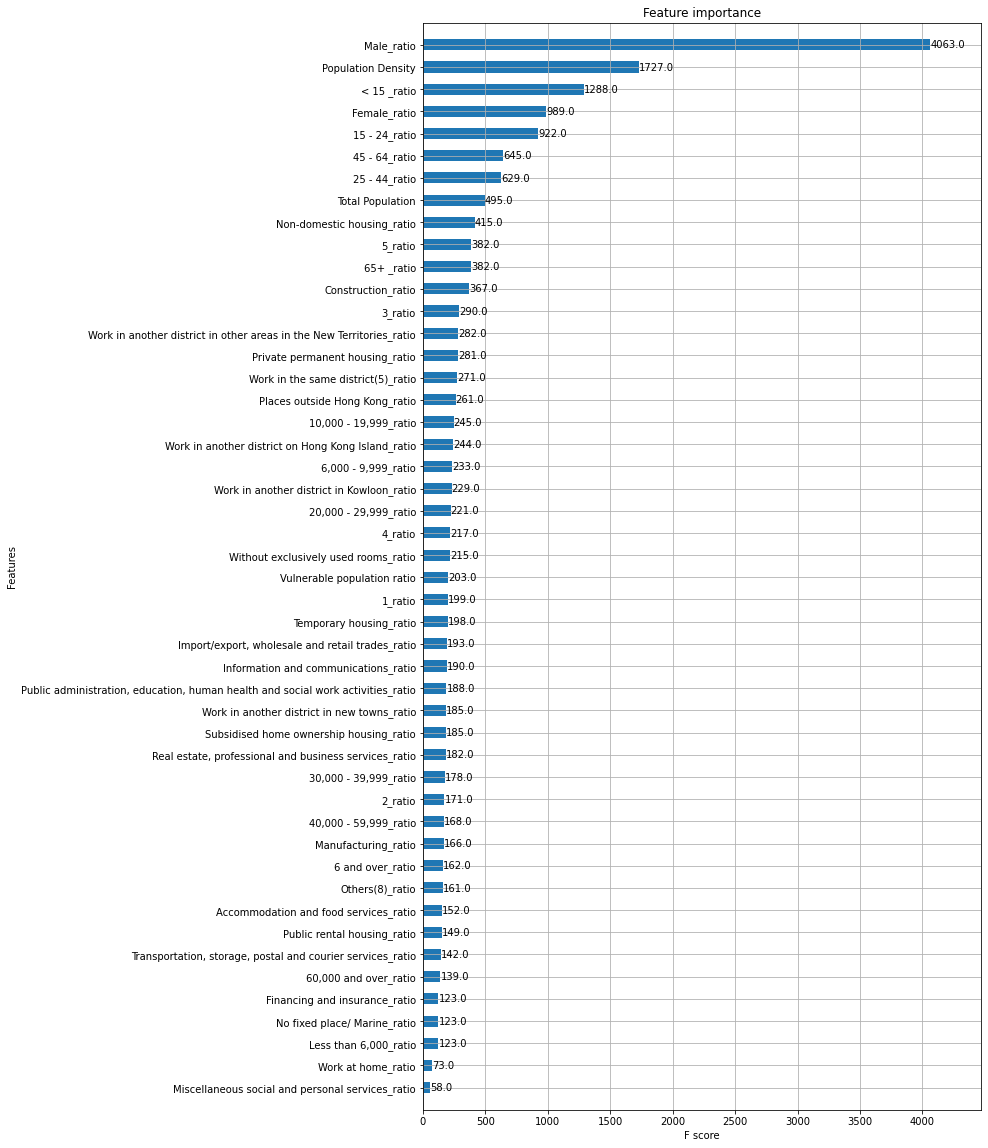

In [372]:
### plot feature importance
fig,ax = plt.subplots(figsize=(10,20))
model.get_booster().feature_names = list(features)
xgb.plot_importance(model.get_booster(),height=0.5,ax=ax,max_num_features=70)
plt.show()

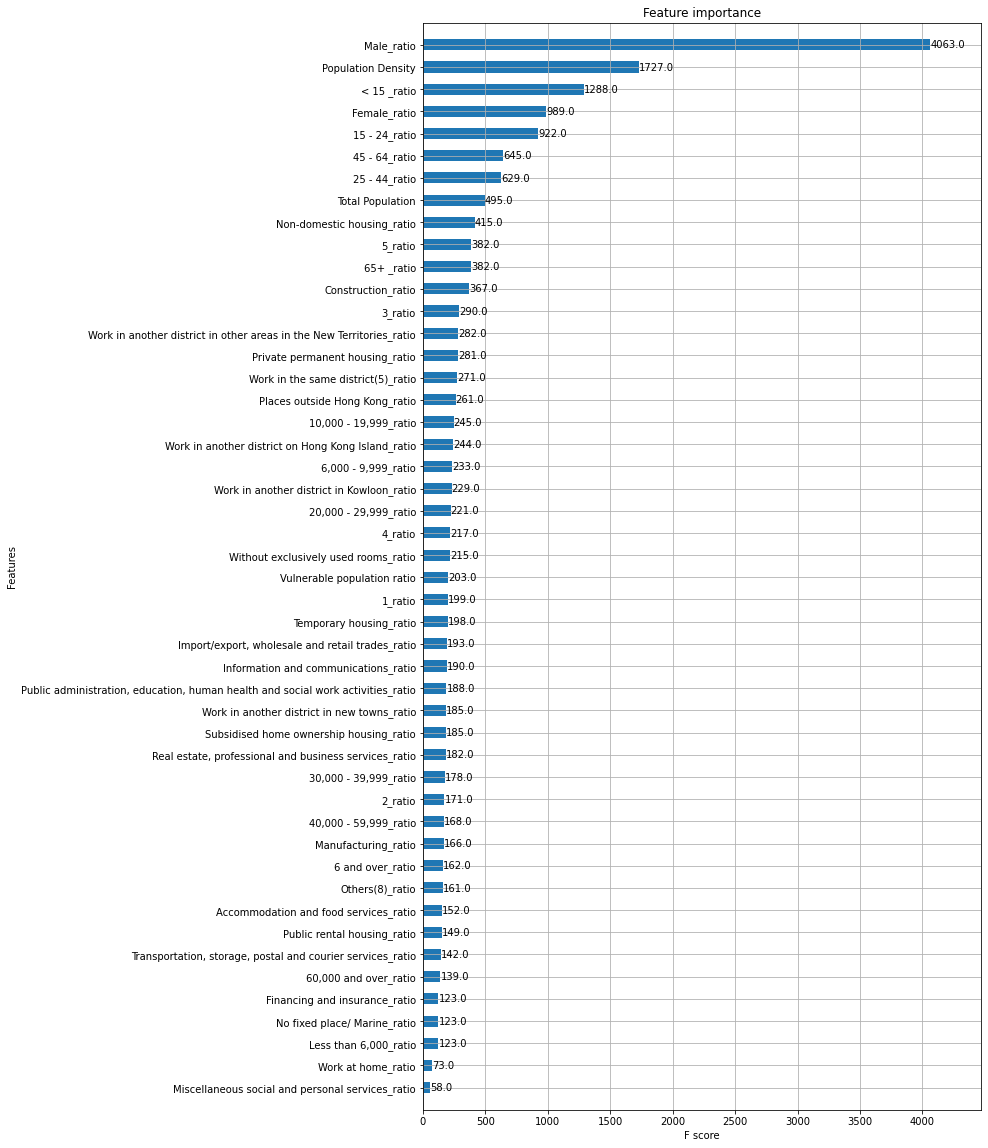

In [373]:
### plot feature importance
fig,ax = plt.subplots(figsize=(10,20))
model.get_booster().feature_names = list(features)
xgb.plot_importance(model.get_booster(),height=0.5,ax=ax,max_num_features=70)
plt.show()

In [374]:
shap.initjs()

In [375]:
d_imputed = scaler.fit_transform(d_imputed)

In [376]:
#df = scaler.fit_transform(df)
df.columns = df.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [377]:
#print(df)

In [378]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df)  # 传入特征矩阵X，计算SHAP值

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [379]:
shap.force_plot(explainer.expected_value, shap_values[0,:], d_imputed[0,:])

In [380]:
shap.force_plot(explainer.expected_value, shap_values, d_imputed)

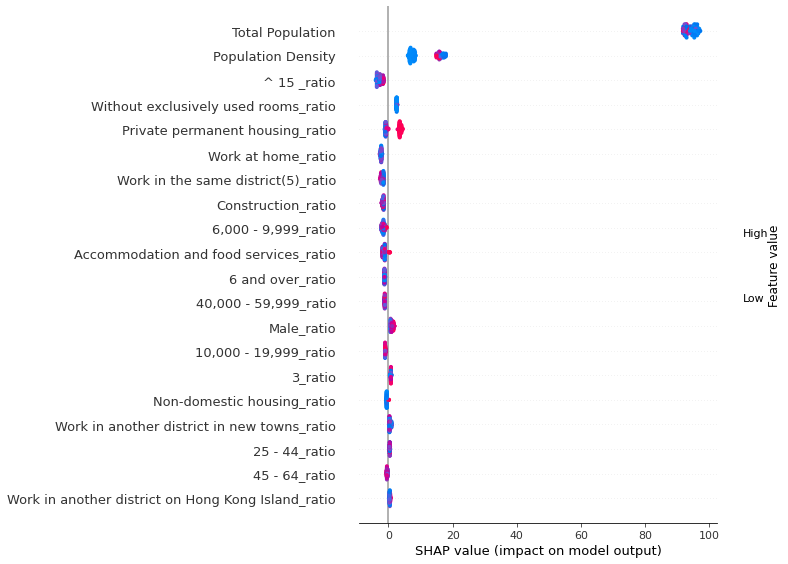

In [381]:
# summarize the effects of all the features
shap.summary_plot(shap_values, df)

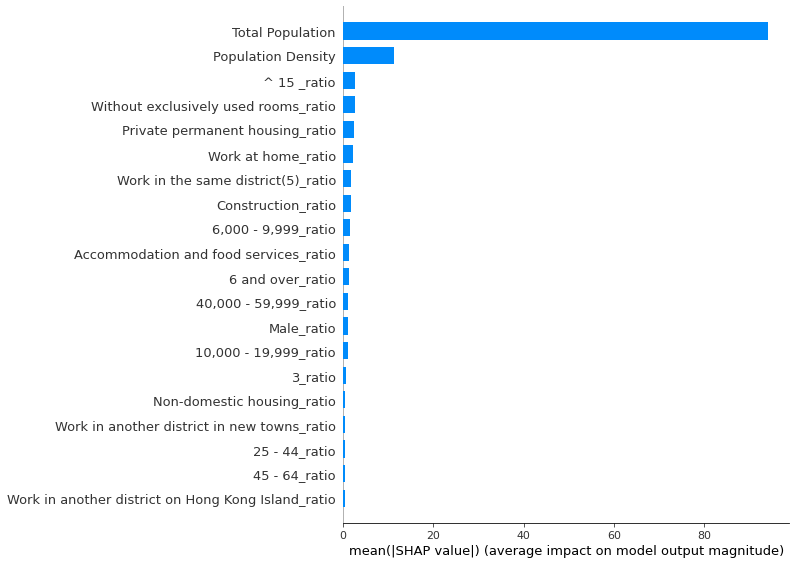

In [382]:
shap.summary_plot(shap_values, df, plot_type="bar")

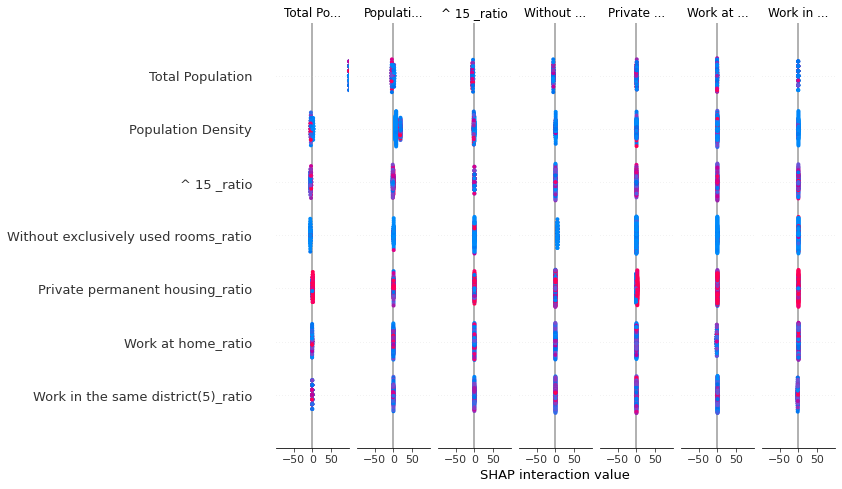

In [383]:
shap_interaction_values = explainer.shap_interaction_values(df)
shap.summary_plot(shap_interaction_values, df)